In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [22]:
data = pd.read_csv('newHIV-1_data/746Data.txt', names = ['Peptides', 'Output'])
data.head(5)

,Peptides,Output
0,AAAKFERQ,-1
1,AAAMKRHG,-1
2,AAAMSSAI,-1
3,AAKFERQH,-1
4,AAKFESNF,-1


In [23]:
data.columns

Index(['Peptides', 'Output'], dtype='object')

In [24]:
# Seperate all amino acids
peptides = np.array([[data["Peptides"][i][j] for i in range(data.shape[0])] for j in range(8)])
data.shape

(746, 2)

In [25]:
# Store the seperated amino acids into a dataframe
data1 = pd.DataFrame(peptides.T, columns=list('ABCDEFGH'))

data = data.assign(**data1)

data = data.drop(columns="Peptides", axis=0)
data1.head()

,A,B,C,D,E,F,G,H
0,A,A,A,K,F,E,R,Q
1,A,A,A,M,K,R,H,G
2,A,A,A,M,S,S,A,I
3,A,A,K,F,E,R,Q,H
4,A,A,K,F,E,S,N,F


In [26]:
x = np.array(data.drop(columns="Output", axis=0))
y = np.array(data.Output)
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7
0,A,A,A,K,F,E,R,Q
1,A,A,A,M,K,R,H,G
2,A,A,A,M,S,S,A,I
3,A,A,K,F,E,R,Q,H
4,A,A,K,F,E,S,N,F


In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
# Encoding Categorical Data
labelencoder_X = LabelEncoder()

for i in range(8):
    x[:, i] = labelencoder_X.fit_transform(x[:, i])
    #print(pd.DataFrame(x[:, i]).head())
onehotencoder = OneHotEncoder(categories = "auto", sparse=True)
x = onehotencoder.fit_transform(x).toarray()
y = np.array(data.Output)

In [28]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [31]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([ 1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,
        1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,
        1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,
        1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,
       -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1],
      dtype=int64)

In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusemat = confusion_matrix(y_test, y_pred)
confusemat

array([[62, 21],
       [ 6, 98]], dtype=int64)

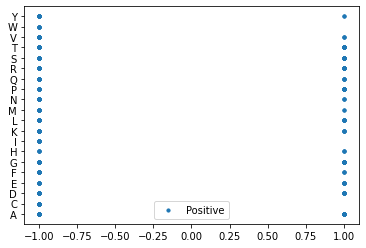

In [34]:
#visualizing data
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], s=10, label='Positive')
# plt.scatter(pd.DataFrame(y).iloc[:, 0], pd.DataFrame(y).iloc[:, 1], s=10, label='Negative')
plt.legend()
plt.show()